In [3]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('/home/mikhail/Рабочий стол/ML_BI_042020/covid_19_data.csv')


In [5]:
def view_matrix(df_train):
    
    '''показывает пропуски по колонкам и общую информацию о сете'''
    for colname in df_train.select_dtypes(include='object').columns:
        print(str(colname) + '\n\n' + str(df_train[colname].value_counts()) + '\n' + '*' * 100 + '\n')
    
    msno.matrix(df_train) 
    display("/usr/local/share/datasets/matrix_sorted.png")
    
    print(df_train.head())
    print(len(df_train) - df_train.count(), df_train.info())

ObservationDate

04/05/2020    319
04/04/2020    316
04/03/2020    315
04/02/2020    315
04/01/2020    313
             ... 
01/26/2020     47
01/23/2020     46
01/25/2020     44
01/24/2020     41
01/22/2020     38
Name: ObservationDate, Length: 75, dtype: int64
****************************************************************************************************

Province/State

Diamond Princess cruise ship    98
Hebei                           77
Gansu                           77
Hong Kong                       75
Shandong                        75
                                ..
Harrison County, KY              1
Travis, CA                       1
Unassigned Location, VT          1
External territories             1
Lackland, TX                     1
Name: Province/State, Length: 296, dtype: int64
****************************************************************************************************

Country/Region

US                     2440
Mainland China         2323
Canada      

'/usr/local/share/datasets/matrix_sorted.png'

   SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12249 entries, 0 to 12248
Data columns (total 8 columns):
SNo                12249 non-null int64
ObservationDate    12249 non-null object
Province/State     6407 non-null object
Country/Region     12249 non-null object
Last Update        12249 non-null object
Confirmed          12249 non-null float6

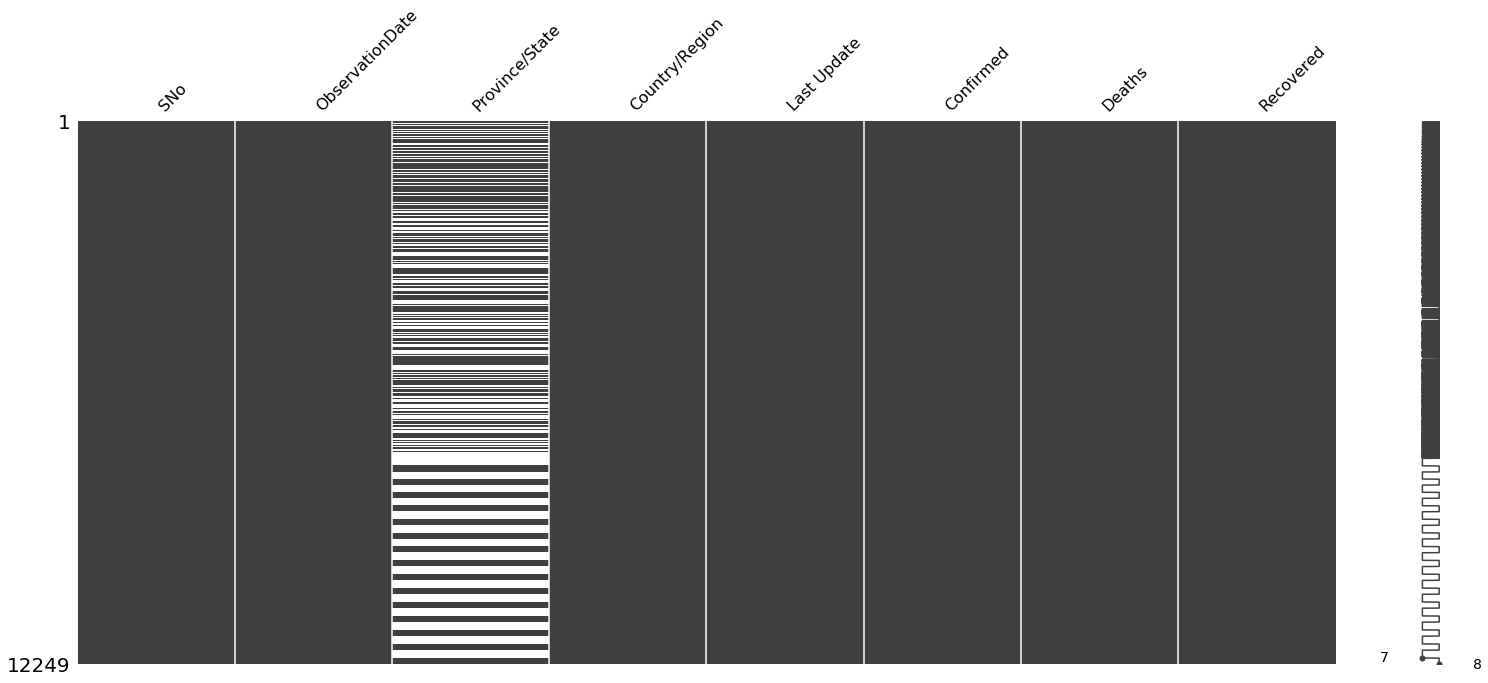

In [6]:
view_matrix(df)

In [9]:
df.fillna('Country/Region')

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
12244,12245,04/05/2020,Wyoming,US,2020-04-05 23:13:44,197.0,0.0,0.0
12245,12246,04/05/2020,Xinjiang,Mainland China,2020-04-05 23:13:44,76.0,3.0,73.0
12246,12247,04/05/2020,Yukon,Canada,2020-04-05 23:13:44,6.0,0.0,0.0
12247,12248,04/05/2020,Yunnan,Mainland China,2020-04-05 23:13:44,184.0,2.0,172.0


In [12]:
df = df.copy()
df['Data']= pd.to_datetime(df['ObservationDate']).dt.date
df['Data']= pd.to_datetime(df['ObservationDate']).dt.date

In [14]:
COV = df.groupby(['Data','Country/Region'])['Confirmed','Deaths','Recovered'].sum()

'/usr/local/share/datasets/matrix_sorted.png'

                           Confirmed  Deaths  Recovered
Data       Country/Region                              
2020-01-22 Hong Kong             0.0     0.0        0.0
           Japan                 2.0     0.0        0.0
           Macau                 1.0     0.0        0.0
           Mainland China      547.0    17.0       28.0
           South Korea           1.0     0.0        0.0
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 6430 entries, (2020-01-22, Hong Kong) to (2020-04-05, Zimbabwe)
Data columns (total 3 columns):
Confirmed    6430 non-null float64
Deaths       6430 non-null float64
Recovered    6430 non-null float64
dtypes: float64(3)
memory usage: 171.9+ KB
Confirmed    0
Deaths       0
Recovered    0
dtype: int64 None


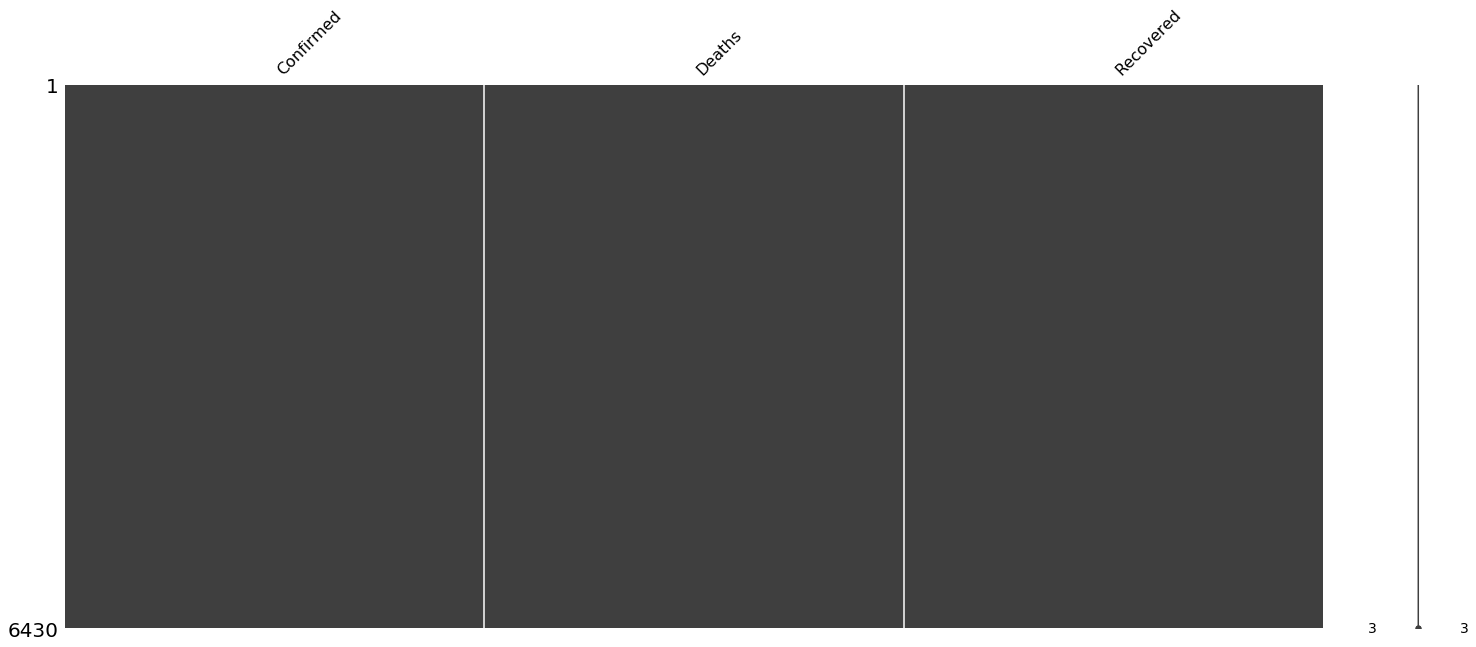

In [15]:
view_matrix(COV)

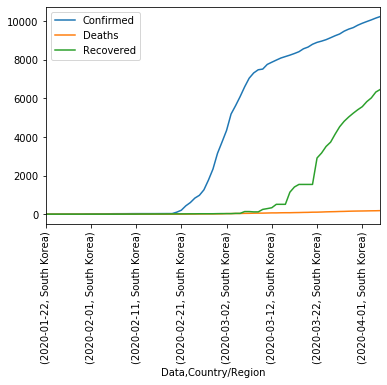

In [37]:
COV.loc[COV.index.get_level_values( 'Country/Region')=='South Korea', ['Confirmed','Deaths','Recovered']].plot()
plt.xticks(label = COV.index.get_level_values('Data'), rotation=90)
# plt.ylabel(logo)
plt.show()

In [22]:
# from scipy.stats import matrix_normal
import plotnine as p9

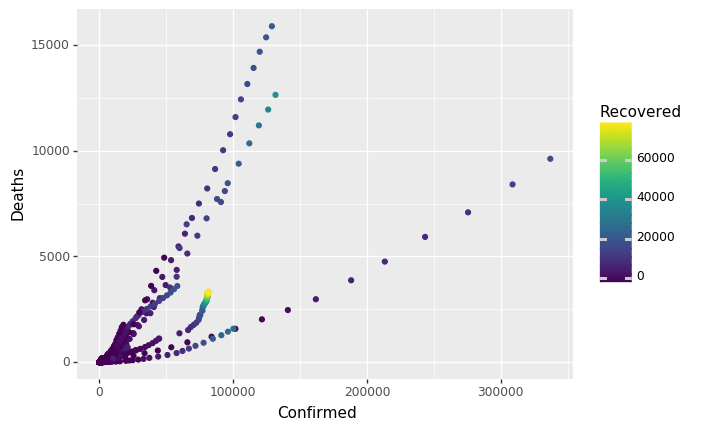

<ggplot: (-9223363263434248956)>


In [36]:
# print(p9.ggplot(COV)+ p9.aes('Confirmed','Recovered', fill='Deaths')+ p9.geom_density(alpha=0.5))
print(p9.ggplot(COV)+ p9.aes(x='Confirmed', y='Deaths', color='Recovered')+ p9.geom_point())
# print(p9.ggplot(COV)+ p9.aes(x='Confirmed', y='Deaths', color='Recovered')+ p9.geom_boxplot())

In [12]:
# для рисования областей
def run_and_plot(clf, X, outliers_fraction, draw_legend=True, title=''):
    clf.fit(X)
    print (clf)
    
    a_prob =  clf.decision_function(X)
    threshold = stats.scoreatpercentile(a_prob, 100 * outliers_fraction)
    
    #print (a_prob)
    
    print ('ошибка  = ' + str( (clf.predict(X) != y).mean()))

    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    #print (Z)

    plt.figure(figsize=(5, 5))
    #plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 20), cmap=plt.cm.binary) # plt.cm.Blues_r cmap=plt.cm.Blues_r)
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 20), cmap=plt.cm.binary) # plt.cm.Blues_r cmap=plt.cm.Blues_r)
    a_ = plt.contour(xx, yy, Z, levels=[threshold], linewidths=1, colors='yellow')
    #plt.contourf(xx, yy, Z, levels=[threshold, Z.max()], colors='#CCDDFF') # CCDDFF
    b_ = plt.scatter(X[y>0, 0], X[y>0, 1], c='white')
    c_ = plt.scatter(X[y<0, 0], X[y<0, 1], c='red')
    plt.axis('tight')
    if draw_legend:
        plt.legend(
            [a_.collections[0], b_, c_],
            [u'разделяющая поверхность', u'нормальные объекты', u'выбросы'],
            prop=matplotlib.font_manager.FontProperties(size=11), loc='upper right')
    plt.title(title)

In [15]:
from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest

In [38]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set style & figures inline
sns.set()
%matplotlib inline


In [39]:


# Data urls
base_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
confirmed_cases_data_url = base_url + 'time_series_covid19_confirmed_global.csv'
death_cases_data_url = base_url + 'time_series_covid19_deaths_global.csv'
recovery_cases_data_url = base_url+ 'time_series_covid19_recovered_global.csv'

# Import datasets as pandas dataframes
raw_data_confirmed = pd.read_csv(confirmed_cases_data_url)
raw_data_deaths = pd.read_csv(death_cases_data_url)
raw_data_recovered = pd.read_csv(recovery_cases_data_url)



In [47]:
# Function for grouping countries by region
def group_by_country(raw_data):
    """Returns data for countries indexed by date"""
    # Group by
    data = raw_data.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)
    # Transpose
    data = data.transpose()
    # Set index as DateTimeIndex
    datetime_index = pd.DatetimeIndex(data.index)
    data.set_index(datetime_index, inplace=True)
    return data

In [49]:

# Function to align growth curves
def align_curves(data, min_val):
    """Align growth curves  to start on the day when the number of known deaths = min_val"""
    # Loop over columns & set values < min_val to None
    for col in data.columns:
        data.loc[(data[col] < min_val),col] = None
    # Drop columns with all NaNs
    data.dropna(axis=1, how='all', inplace=True)
    # Reset index, drop date
    data = data.reset_index().drop(['index'], axis=1)
    # Shift each column to begin with first valid index
    for col in data.columns:
        data[col] = data[col].shift(-data[col].first_valid_index())
    return data



In [50]:

# Function to plot time series
def plot_time_series(df, plot_title, x_label, y_label, logy=False):
    """Plot time series and make looks a bit nice"""
    ax = df.plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, logy=logy)
    ax.legend(ncol=3, loc='lower right')
    plt.xlabel(x_label, fontsize=20);
    plt.ylabel(y_label, fontsize=20);
    plt.title(plot_title, fontsize=20);


In [53]:


# Function to plot time series
def plot_time_series(df, plot_title, x_label, y_label, logy=False):
    """Plot time series and make looks a bit nice"""
    ax = df.plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, logy=logy)
    ax.legend(ncol=3, loc='lower right')
    plt.xlabel(x_label, fontsize=20);
    plt.ylabel(y_label, fontsize=20);
    plt.title(plot_title, fontsize=20);



In [54]:


deaths_country_drop = group_by_country(raw_data_deaths)
deaths_country_drop = align_curves(deaths_country_drop, min_val=25)

In [56]:
# create long data for deaths
deaths_long = deaths_country_drop.reset_index().melt(id_vars='index', value_name='Deaths').rename(columns={'index':'Day'})
deaths_long.head()

,Day,Country/Region,Deaths
0,0,Algeria,25.0
1,1,Algeria,26.0
2,2,Algeria,29.0
3,3,Algeria,31.0
4,4,Algeria,35.0


In [43]:
# pip install altair

     |████████████████████████████████| 727 kB 537 kB/s 
Note: you may need to restart the kernel to use updated packages.


In [44]:
import altair as alt

In [57]:


# altair plot 
alt.Chart(deaths_long).mark_line().encode(
    x='Day',
    y='Deaths',
    color='Country/Region')

alt.Chart(...)

In [59]:


# altair plot 
alt.Chart(deaths_long).mark_line(strokeWidth=4, opacity=0.7).encode(
    x=alt.X('Day'),
    y=alt.Y('Deaths', scale=alt.Scale(type='log')),
    color='Country/Region',
    tooltip=['Country/Region', 'Day','Deaths']
).properties(
    width=800,
    height=650
)



alt.Chart(...)

In [58]:
# Selection tool
selection = alt.selection_single(fields=['Country/Region'])
# Color change when clicked
color = alt.condition(selection,
                    alt.Color('Country/Region:N'),
                    alt.value('lightgray'))


# Base altair plot 
base = alt.Chart(deaths_long).mark_line(strokeWidth=4, opacity=0.7).encode(
    x=alt.X('Day'),
    y=alt.Y('Deaths', scale=alt.Scale(type='log')),
    color='Country/Region',
    tooltip=['Country/Region', 'Day','Deaths']
).properties(
    width=800,
    height=650
)

# Chart
chart = base.encode(
  color=alt.condition(selection, 'Country/Region:N', alt.value('lightgray'))
).add_selection(
  selection
)

# Overlay
overlay = base.encode(
    color='Country/Region',
  opacity=alt.value(0.5),
  tooltip=['Country/Region:N', 'Name:N']
).transform_filter(
  selection
)

# Sum em up!
chart + overlay


alt.LayerChart(...)